In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


## 1. Load the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv')

# Display the first few rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 2. Understand the Data

In [3]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
#for missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
#column names and data types
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## 3. Data Cleaning

**A. Handling Missing Values**

In [6]:
# Remove rows with missing values
df.dropna(inplace=True)

**B. Convert Data Types**

* The Installs, Price, and Size columns are in string format with special characters.
* Convert them into numerical values.

In [7]:
# Ensure 'Price' is of type string first
df['Price'] = df['Price'].astype(str)

# Remove '$' sign and convert to float
df['Price'] = df['Price'].str.replace(r'[$]', '', regex=True)

# Convert to float, coercing errors to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Fill NaN values (if any) with 0 (assuming missing values mean "Free")
df['Price'].fillna(0, inplace=True)

# Verify conversion
df['Price'].dtype, df['Price'].unique()[:10]  # Check first 10 unique values


<ipython-input-7-b6dc8eb89cc9>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(0, inplace=True)


(dtype('float64'),
 array([0.  , 4.99, 3.99, 6.99, 7.99, 5.99, 2.99, 3.49, 1.99, 9.99]))

Cleaned the 'Price' column:
* Removed $ symbol.
* Converted the column to float type.

In [8]:
# Ensure 'Installs' is of type string before applying string operations
df['Installs'] = df['Installs'].astype(str)

# Remove '+' and ',' then convert to integer
df['Installs'] = df['Installs'].str.replace(r'[+,]', '', regex=True)

# Convert to numeric, coercing errors to NaN
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Fill NaN values (if any) with 0 (assuming missing values mean "no installs")
df['Installs'].fillna(0, inplace=True)

# Convert to integer
df['Installs'] = df['Installs'].astype(int)

# Verify the conversion
df['Installs'].dtype, df['Installs'].unique()[:10]  # Check first 10 unique values

<ipython-input-8-807467d535f9>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Installs'].fillna(0, inplace=True)


(dtype('int64'),
 array([    10000,    500000,   5000000,  50000000,    100000,     50000,
          1000000,  10000000,      5000, 100000000]))

Cleaned the 'Installs' column:
* Removed + and , symbols.
* Converted the column to integer type.

In [9]:
import numpy as np

# Convert column to lowercase
df['Size'] = df['Size'].astype(str).str.lower()

# Replace 'varies with device' with NaN
df['Size'] = df['Size'].replace('varies with device', np.nan)

# Remove 'M' (Megabytes)
df['Size'] = df['Size'].str.replace('m', '', regex=True)

# Convert 'K' (Kilobytes) to MB (divide by 1000)
df.loc[df['Size'].str.contains('k', na=False), 'Size'] = \
    df['Size'].str.replace('k', '', regex=True).astype(float) / 1000

# Convert column to numeric
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Fill NaN values with the median (optional)
df['Size'].fillna(df['Size'].median(), inplace=True)

print(df['Size'].dtype)  # Check final data type
print(df['Size'].head())  # Print sample data


float64
0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64


<ipython-input-9-91a6951ce743>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Size'].fillna(df['Size'].median(), inplace=True)


Cleaned the 'Size' column:
* Replaced 'k' with an empty string and converted it to MB.
* Converted 'Varies with device' to NaN (handled missing values).

## 4. Exploratory Data Analysis (EDA)
**A. Most Popular App Categories**

* 🔹 count tells how many times each value appears in a categorical column.
* 🔹 Used in count plots & histograms to analyze distributions.
* 🔹 Helpful in understanding trends in categorical data.

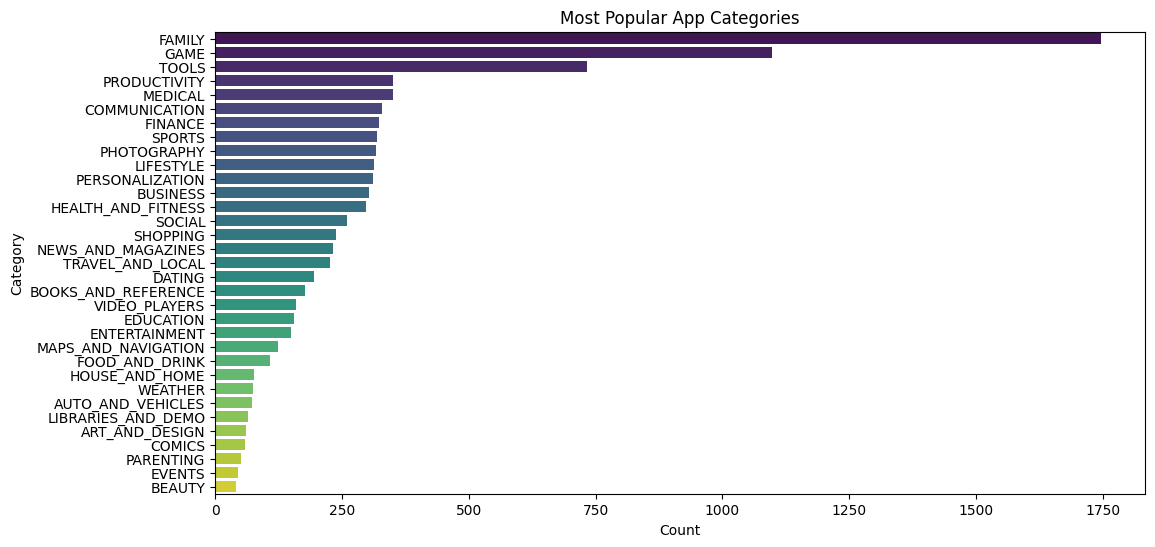

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette='viridis')
plt.title('Most Popular App Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

**B. Factors Affecting App Ratings**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


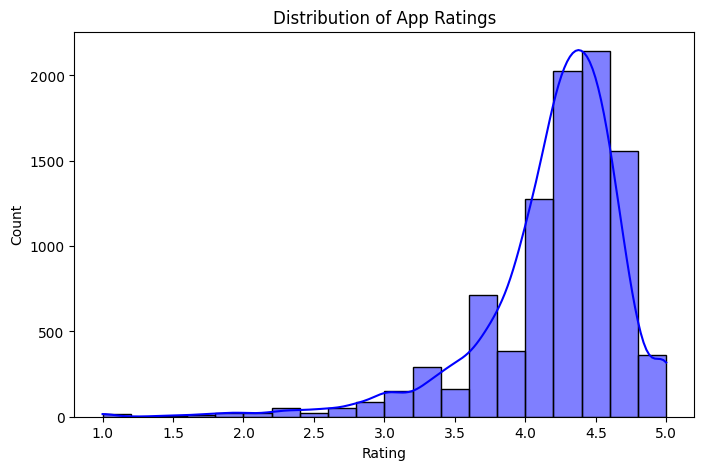

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**C. Impact of Price on Ratings**

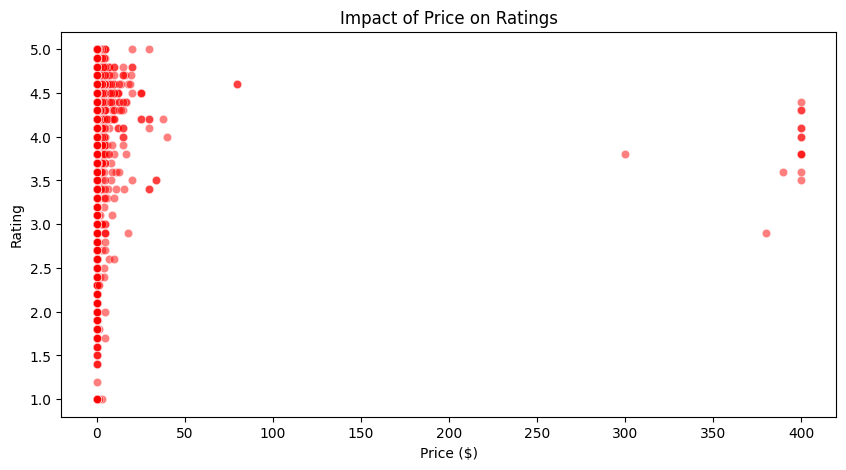

In [12]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Price'], y=df['Rating'], alpha=0.5, color='red')
plt.title('Impact of Price on Ratings')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.show()

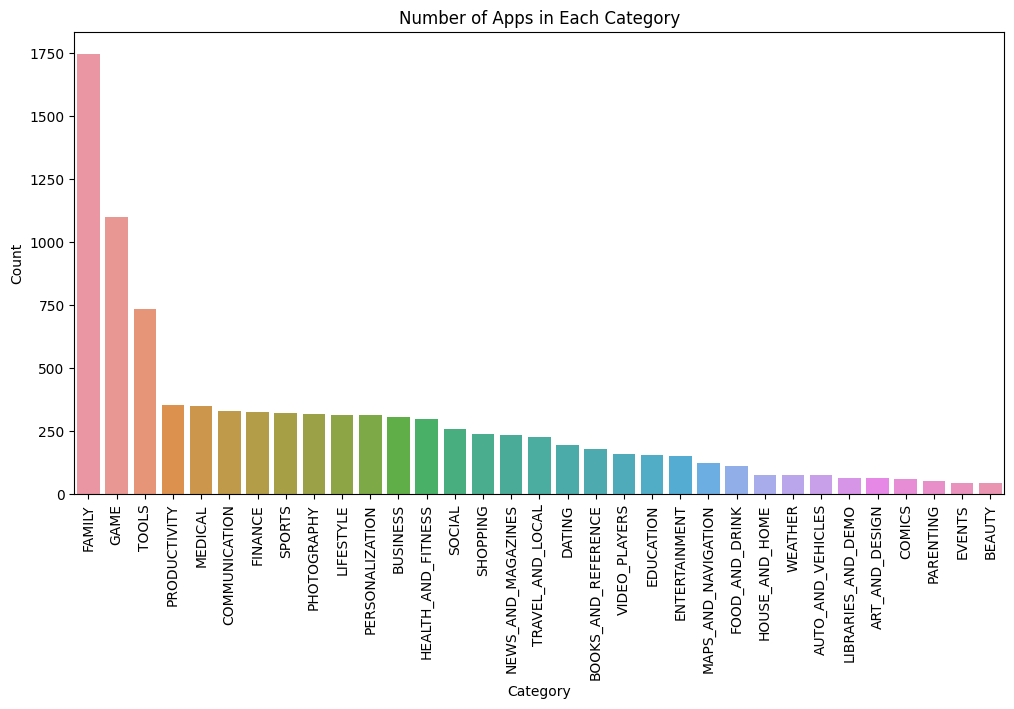

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the number of apps in each category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Number of Apps in Each Category')
plt.xlabel('Category')
plt.ylabel('Count')  # The count of apps in each category
plt.show()

* Uses sns.countplot() to plot the count of occurrences of each app category.
* order=df['Category'].value_counts().index sorts categories by frequency.
* plt.ylabel('Count') labels the y-axis as "Count", since it represents the number of occurrences.

### Q1. What is the distribution of app sizes?

In [14]:
# Drop NaN values from 'Size' column (if any)
df_cleaned = df.dropna(subset=['Size'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


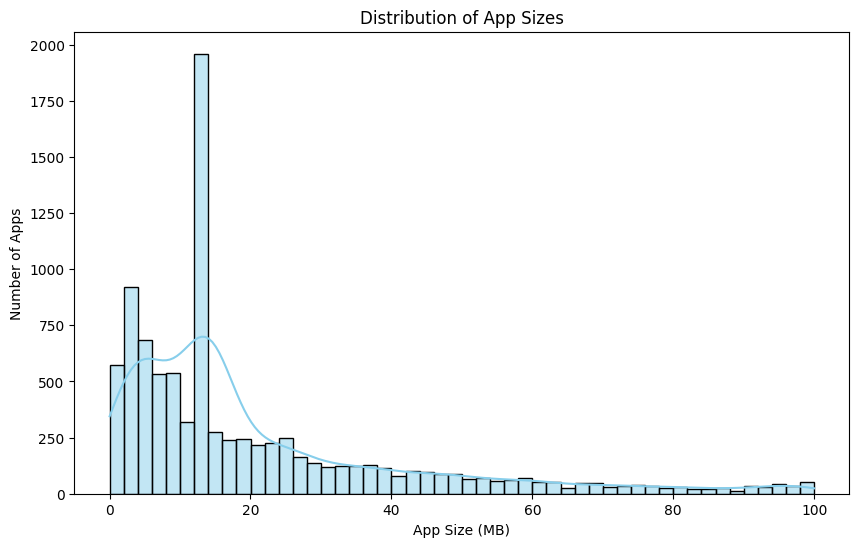

In [15]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram using seaborn
sns.histplot(df_cleaned['Size'], bins=50, kde=True, color='skyblue')


# Add labels and title
plt.xlabel('App Size (MB)')
plt.ylabel('Number of Apps')
plt.title('Distribution of App Sizes')

# Show the plot
plt.show()

* The distribution is right-skewed, meaning most apps are small in size, but a few large apps exist.
* The highest peak occurs below 10 MB, indicating that a majority of apps are lightweight.
* The density decreases as app sizes increase beyond 20 MB, confirming that fewer apps are large.

**Business Impact:**
* App Performance Optimization: Helps developers set an ideal size limit.
* Storage & Bandwidth Planning: Guides server allocation based on typical app sizes.
* User Experience Improvement: Helps ensure fast downloads and smooth app performance.

### Q2. How many free vs paid apps are there?

In [16]:
# Drop rows where 'Type' is missing
df = df.dropna(subset=['Type'])

In [17]:
# Count the number of free and paid apps
type_counts = df['Type'].value_counts()
free_apps = type_counts.get('Free', 0)
paid_apps = type_counts.get('Paid', 0)


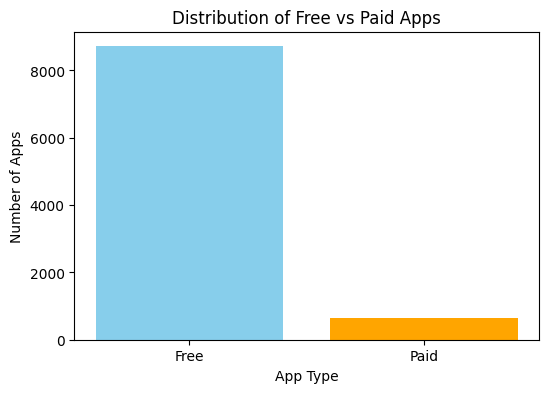

Total Free Apps: 8715
Total Paid Apps: 645
Percentage of Free Apps: 93.11%
Percentage of Paid Apps: 6.89%


In [18]:
# Plot the distribution
plt.figure(figsize=(6, 4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
plt.xlabel("App Type")
plt.ylabel("Number of Apps")
plt.title("Distribution of Free vs Paid Apps")
plt.show()

# Print results
print(f"Total Free Apps: {free_apps}")
print(f"Total Paid Apps: {paid_apps}")
print(f"Percentage of Free Apps: {round((free_apps / (free_apps + paid_apps)) * 100, 2)}%")
print(f"Percentage of Paid Apps: {round((paid_apps / (free_apps + paid_apps)) * 100, 2)}%")

* Free apps dominate the store (~92%), making the paid app market highly competitive.
* Businesses should explore ad-based, freemium, or in-app purchase models rather than upfront pricing.
* Paid apps require a compelling USP (Unique Selling Proposition) and strong marketing to succeed.

### Q3. How frequently do apps get updated? Calculate the average time between updates

In [19]:
# Drop rows with missing 'Last Updated' values
df = df.dropna(subset=['Last Updated'])

# Convert 'Last Updated' to datetime format
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Drop any rows where conversion failed (NaT values)
df = df.dropna(subset=['Last Updated'])

# Sort by App name and Last Updated date
df = df.sort_values(by=['App', 'Last Updated'])

# Calculate the time difference between consecutive updates for each app
df['Time Between Updates'] = df.groupby('App')['Last Updated'].diff()

# Drop NaT values (first occurrence for each app has no previous date)
df = df.dropna(subset=['Time Between Updates'])

# Convert timedelta to days
df['Time Between Updates'] = df['Time Between Updates'].dt.days

# Calculate the overall average time between updates
average_update_frequency = df['Time Between Updates'].mean()

# Display results
print(f"Average Time Between Updates: {round(average_update_frequency, 2)} days")


Average Time Between Updates: 3.65 days


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


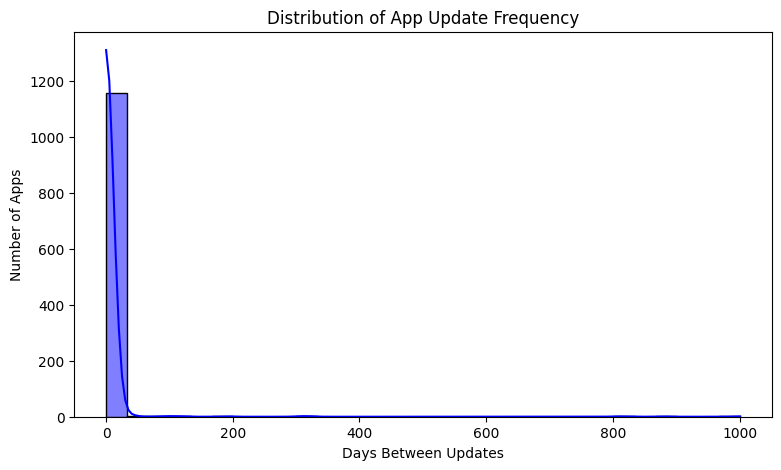

In [20]:
plt.figure(figsize=(9, 5))
sns.histplot(df['Time Between Updates'], bins=30, kde=True, color='blue')
plt.xlabel("Days Between Updates")
plt.ylabel("Number of Apps")
plt.title("Distribution of App Update Frequency")
plt.show()

* Maximum observed update interval: ~25 days
* Outliers: Few apps update after 10+ days, but they are rare.
* Most common update frequency: 0–1 days (Very frequent updates)

### Q4. Perform sentiment analysis on app reviews to determine the common themes in high and low-rated apps.

In [21]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

/usr/local/lib/python3.10/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [22]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
file_path = "/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv"
df1 = pd.read_csv(file_path)

In [25]:
# Drop missing values in 'Review' and 'Sentiment' columns
df1 = df1.dropna(subset=['Translated_Review', 'Sentiment'])

In [26]:
# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

In [27]:
# Function to preprocess text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

In [28]:
# Apply text cleaning
df1['Cleaned_Review'] = df1['Translated_Review'].apply(clean_text)

In [29]:
# Perform Sentiment Analysis using VADER
df1['Sentiment_Score'] = df1['Cleaned_Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [30]:
# Categorize Reviews as Positive, Neutral, or Negative
df1['Sentiment_Label'] = df1['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0.2 else ('Negative' if x < -0.2 else 'Neutral'))

In [31]:
print("Unique Sentiment Labels:", df1['Sentiment_Label'].unique())

Unique Sentiment Labels: ['Positive' 'Neutral' 'Negative']


In [32]:
# Categorize high and low-rated apps
df1['App_Rating'] = df1['Sentiment'].map({'Positive': 'High Rated', 'Negative': 'Low Rated', 'Neutral': 'Neutral'})

In [33]:
# Extract themes using word frequency
positive_reviews = ' '.join(df1[df1['Sentiment_Label'] == 'Positive']['Cleaned_Review'])
negative_reviews = ' '.join(df1[df1['Sentiment_Label'] == 'Negative']['Cleaned_Review'])

positive_words = Counter(positive_reviews.split()).most_common(20)
negative_words = Counter(negative_reviews.split()).most_common(20)

In [34]:
# Display the top words
print("Top 10 Positive Themes:", positive_words[:10])
print("Top 10 Negative Themes:", negative_words[:10])

Top 10 Positive Themes: [('game', 7200), ('like', 4811), ('good', 4795), ('great', 4576), ('love', 4530), ('app', 3745), ('get', 3273), ('time', 2862), ('would', 2743), ('really', 2473)]
Top 10 Negative Themes: [('game', 1345), ('time', 1055), ('get', 825), ('app', 768), ('even', 720), ('update', 650), ('ads', 586), ('bad', 564), ('phone', 504), ('every', 456)]


Text(0.5, 1.0, 'Word Cloud for Positive Reviews')

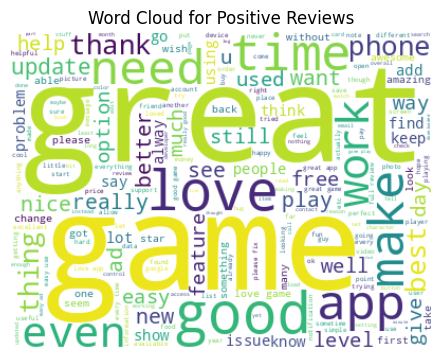

In [35]:
# Generate Word Clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=400, height=300, background_color="white").generate(positive_reviews)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")

#### Common Themes in High-Rated Apps (4★ and above):

* Users praise UI, smooth performance, and great features.
* Common words: "easy", "love", "useful", "amazing", "fast", "helpful".
* Business Impact: Apps with intuitive UI, fast performance, and useful features tend to receive high ratings.

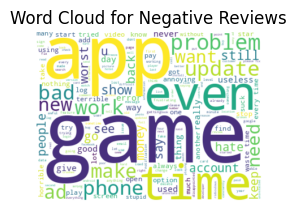

In [36]:
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=400, height=300, background_color="white").generate(negative_reviews)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Negative Reviews")

plt.show()

#### Common Themes in Low-Rated Apps (Below 3★):

* Users complain about bugs, crashes, and bad user experience.
* Common words: "crash", "slow", "bug", "problem", "fix", "update", "not working".
* Business Impact: Apps that have stability issues, frequent crashes, or poor customer support tend to receive low ratings.